In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### Task 1: Let's try boxplots for TV, Radio and Newspaper


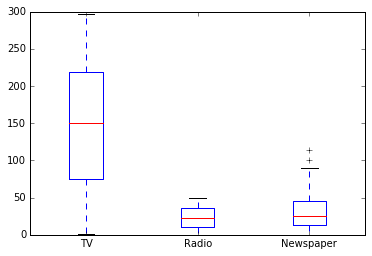

In [5]:
# Your boxplots
plt.boxplot([data['TV'], data['Radio'], data['Newspaper']])

plt.xticks([1,2,3],['TV', 'Radio', 'Newspaper'])

plt.show()

#### Task 2 :  Write down what you learn from TV, Radio, Newspaper and Sales Boxplots?

Answer: TV is suspiciously symmetrical with no outliers; Radio also appears to be completely symmetrica; Newspaper is symmetrical enough, but has a couple of variables. 


# Let's play with correlation

#### Task 3: Find Correlations Matrix of your data and explain what you cam learn from it. For instance, which variable can depict Sales the best? (TV, Radio or Newspaper). What is the highest and lowest correlation?  



In [6]:
# your Corrolation code shall be written here:
data.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


What did you learn from correlation Matrix?
Answer: 
TV and Sales have a strong, positive correlation. Newspaper and Sales has the lowest. The variable TV can depict Sales the best. 

# Let's get rid of outliers.

#### Task 4
First: Look over your boxplots and pick one variable that likely has outliers.

Second: Find Interquartile Range (IQR) of that variable. You can do this in three different ways. 
    - Use df.describe()
    - Use df.quantile()
    - Use np.percentile()
Third: Remember, one definition of outliers is anything that is more than 1.5*IQR above Q3 or 1.5QR below Q1 (For this example solely focus on 1.5*IQR above Q3)
Fourth: delete the outlier rows.

#### Which Variable seems to have outliers?

Answer: 

In [7]:
# Before you start check how many observations are in your DataFrame
len(data)

200

In [8]:
#Step 2 Let's find IQR
Q1 = data.Newspaper.quantile(0.25)
Q3 = data.Newspaper.quantile(0.75)
IQR = Q3 - Q1
Top = 1.5*IQR + Q3
print Top


93.625


In [9]:
#Step 3
data.drop(data[data['Newspaper'] > Top].index, inplace = True)

In [10]:
# Check the length of your data and see if you have correctly dropped outliers.
len(data)

198

# Your last mission!

#### Task 5:
Our goal is to divide our dataset to High Sales and Low Sales. We would like to add a dummy variable called Sales_Dummy which is 0 if Sales of that specific observation is less than Median of all Sales and is 1 if sales is more than median of Sales.


In [11]:
data['Sales_Dummy'] = 0

data.loc[data.Sales >= data.Sales.median(), 'Sales_Dummy'] = 1

In [12]:
data.head()

,TV,Radio,Newspaper,Sales,Sales_Dummy
1,230.1,37.8,69.2,22.1,1
2,44.5,39.3,45.1,10.4,0
3,17.2,45.9,69.3,9.3,0
4,151.5,41.3,58.5,18.5,1
5,180.8,10.8,58.4,12.9,1


# Bonus 1

#### In one Scatterplot show (TV, Radio, and Newspaper) as X and their corresponding Sales as Y. Use different colors and different legends to show different varaibles. 

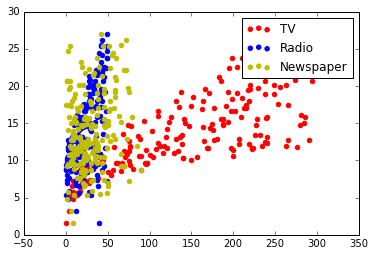

In [14]:
plt.scatter(data.TV, data.Sales, color = "r", label = 'TV')

plt.scatter(data.Radio, data.Sales, color = "b", label = 'Radio')

plt.scatter(data.Newspaper, data.Sales, color = "y", label = 'Newspaper')

plt.legend()
plt.show()

# Bonus 2

#### Part a
Simulate the following gambling game. Imagine you are gambling on a slot machine with the following pay off tables. Each time you play, with probability 80% you lose what you put in, i.e. your outcome is -1. With the probability of 10% machine gives you back +2, and with probability 10% it gives you back +5. 

In [15]:
#Hint 
import random
random.random() # gives you a random number between 0 and 1 from a uniform distribution

def SlotMachine(plays):
    all_payoffs = []
   
    for i in range (plays):
        payoff = 0
        Current_Random = random.random()
    
        if Current_Random <= 0.8:
            payoff = -1
        elif Current_Random <= 0.9:
            payoff = 2
        else:
            payoff = 5
    
        all_payoffs.append(payoff)
        
    return np.array(all_payoffs)

print SlotMachine(20)
    
    
        
    

[-1 -1 -1 -1 -1  5 -1  2 -1  5 -1  2  2 -1 -1 -1 -1 -1 -1 -1]


#### Part b
Play this game 100 times what is your average outcome? Did you win/lose?

In [16]:
print SlotMachine(100).mean()

-0.16


#### Part c

Imagine there are 1000 people who are playing simultanously on similar machines. Each person plays 50 times. Draw the distribution of average win/lose of these 1000 people. (+ means win, and - means lose)

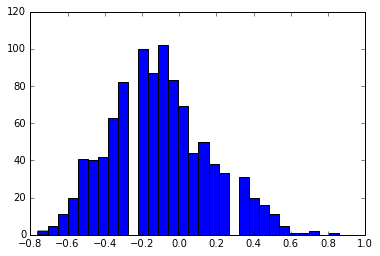

In [17]:
def machine_simulation(players, tries):
    avg_payoff = []
    for i in range(players):
        payoff = SlotMachine(tries).mean()
        avg_payoff.append(payoff)
        
    return np.array(avg_payoff)

plt.hist(machine_simulation(1000,50), 30)
plt.show()